In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}  # Bypass 403 error

response = requests.get(url, headers=headers)
html_str = StringIO(response.text)

tesla_revenue = pd.read_html(
    html_str, 
    match="Tesla Quarterly Revenue",
    encoding="UTF-8"
)[0]

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
tesla_revenue.tail()

,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [4]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Screenshot this output

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_str = StringIO(response.text)

gme_revenue = pd.read_html(
    html_str,
    match="GameStop Quarterly Revenue",
    encoding="UTF-8"
)[0]

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[$,]', '', regex=True).astype(float)
gme_revenue.tail() 

,Date,Revenue
60,2010-01-31,3524.0
61,2009-10-31,1835.0
62,2009-07-31,1739.0
63,2009-04-30,1981.0
64,2009-01-31,3492.0


In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    try:
        plt.figure(figsize=(12,6))
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        
        ax1.plot(stock_data['Date'], stock_data['Close'], color='#1f77b4')
        ax2.bar(revenue_data['Date'], revenue_data['Revenue'], 
               color='orange', alpha=0.5)
        
        ax1.set_ylabel('Stock Price', color='#1f77b4')
        ax2.set_ylabel('Revenue', color='orange')
        plt.title(title)
        plt.show()
        
    except Exception as e:
        print(f"Plotting error: {str(e)}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 128.0 MB/s eta 0:00:00


In [11]:
!pip install yfinance pandas requests beautifulsoup4 matplotlib

In [14]:
import pandas as pd

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


In [16]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12,6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    ax1.plot(stock_data['Date'], stock_data['Close'], color='#1f77b4')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='orange', alpha=0.5)
    
    ax1.set_ylabel('Stock Price', color='#1f77b4')
    ax2.set_ylabel('Revenue', color='orange')
    plt.title(title)
    plt.show()

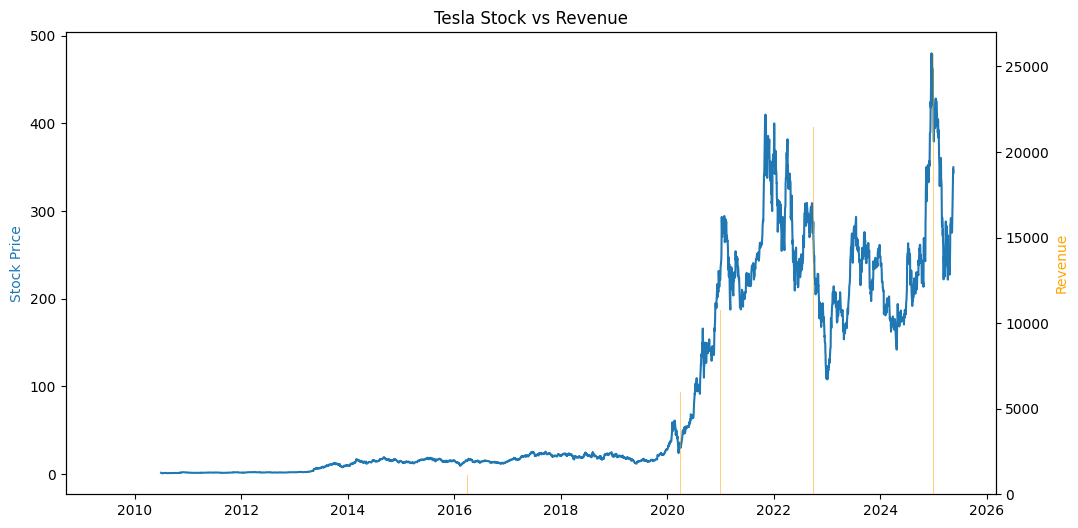

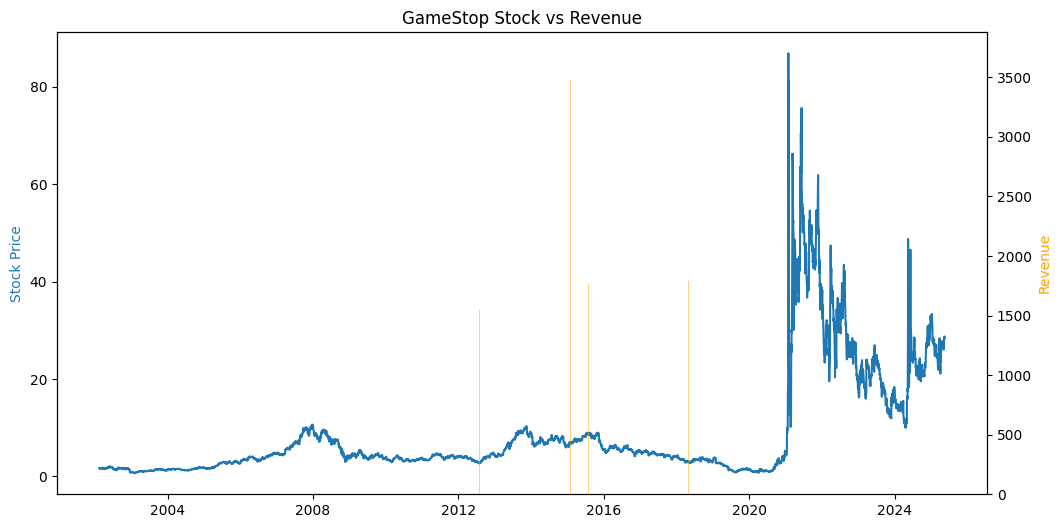

In [18]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12,6))
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    ax1.plot(stock_data['Date'], stock_data['Close'], color='#1f77b4')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='orange', alpha=0.5)
    
    ax1.set_ylabel('Stock Price', color='#1f77b4')
    ax2.set_ylabel('Revenue', color='orange')
    plt.title(title)
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla Stock vs Revenue') 

make_graph(gme_data, gme_revenue, 'GameStop Stock vs Revenue') 